In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ------------------------ Configurar semilla para reproducibilidad ------------------------
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
# ------------------------ 1️⃣ Cargar el dataset ------------------------
file_path = "House_Rent_Dataset.csv"
df = pd.read_csv(file_path)

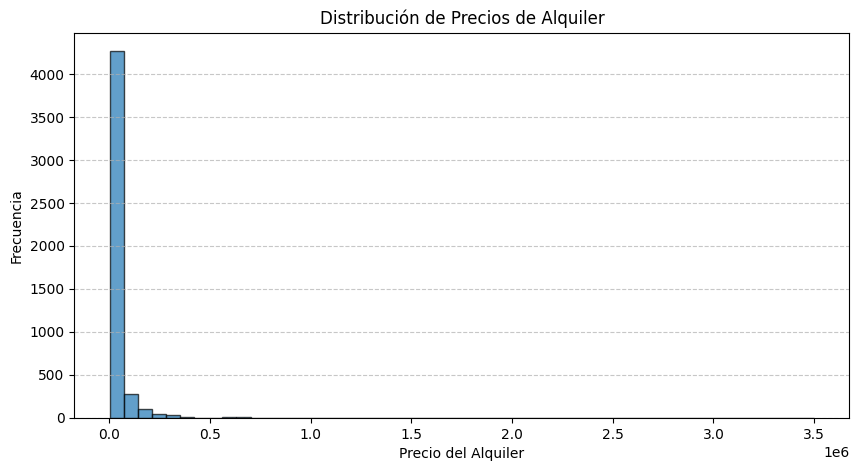

In [ ]:
# Distribución de precios de alquiler
plt.figure(figsize=(10,5))
plt.hist(df['Rent'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Precio del Alquiler')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Alquiler')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

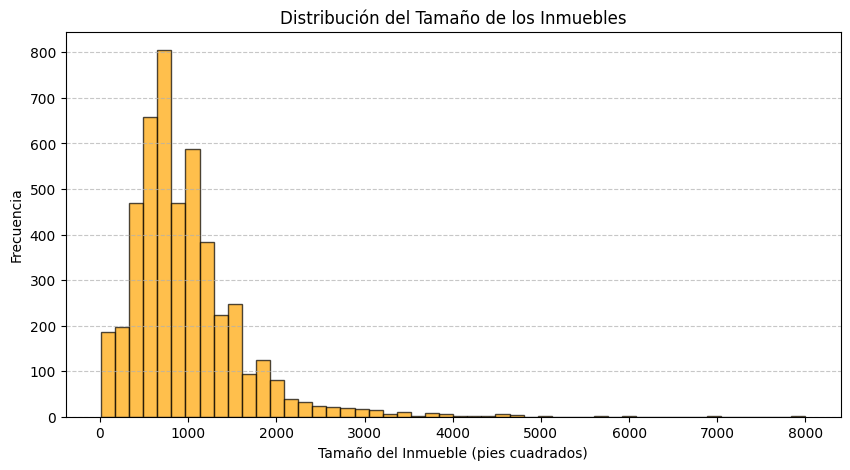

In [ ]:
# Distribución del tamaño de los inmuebles
plt.figure(figsize=(10,5))
plt.hist(df['Size'], bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Tamaño del Inmueble (pies cuadrados)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tamaño de los Inmuebles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

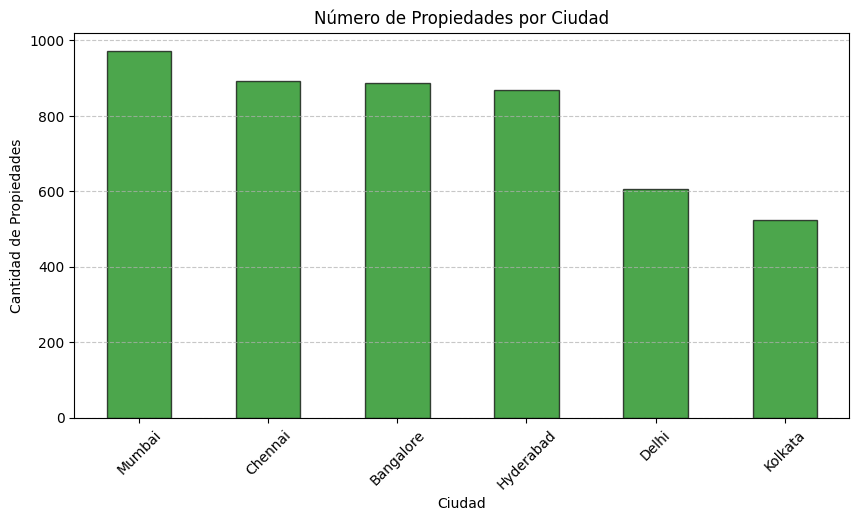

In [ ]:
# Conteo de propiedades por ciudad
plt.figure(figsize=(10,5))
df['City'].value_counts().plot(kind='bar', color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Propiedades')
plt.title('Número de Propiedades por Ciudad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

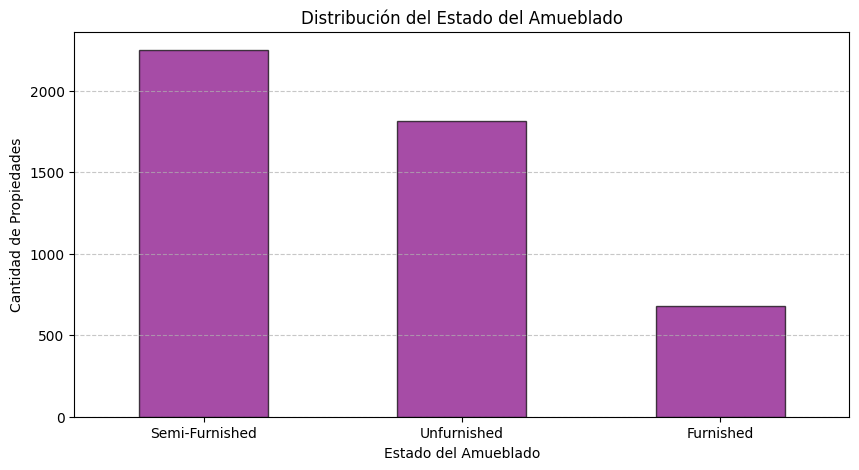

In [ ]:
# Conteo de tipos de amueblado
plt.figure(figsize=(10,5))
df['Furnishing Status'].value_counts().plot(kind='bar', color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Estado del Amueblado')
plt.ylabel('Cantidad de Propiedades')
plt.title('Distribución del Estado del Amueblado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


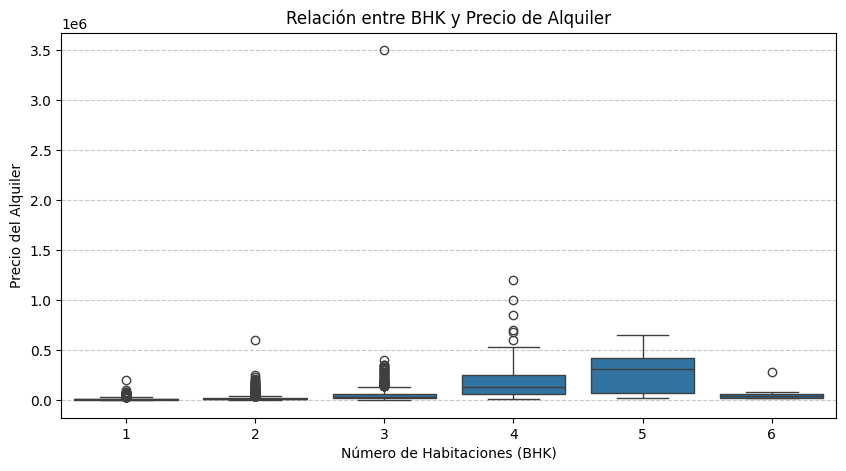

In [ ]:
# Relación entre BHK y precio del alquiler
plt.figure(figsize=(10,5))
sns.boxplot(x=df['BHK'], y=df['Rent'])
plt.xlabel('Número de Habitaciones (BHK)')
plt.ylabel('Precio del Alquiler')
plt.title('Relación entre BHK y Precio de Alquiler')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

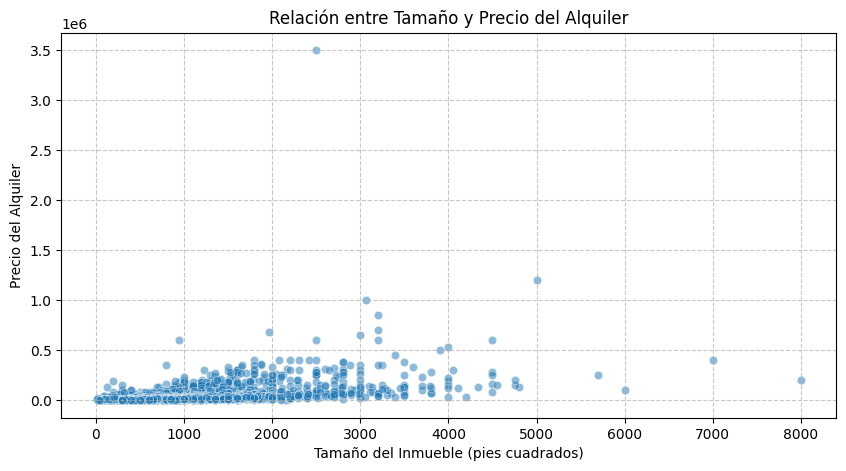

In [ ]:
# Relación entre tamaño y precio del alquiler
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Size'], y=df['Rent'], alpha=0.5)
plt.xlabel('Tamaño del Inmueble (pies cuadrados)')
plt.ylabel('Precio del Alquiler')
plt.title('Relación entre Tamaño y Precio del Alquiler')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


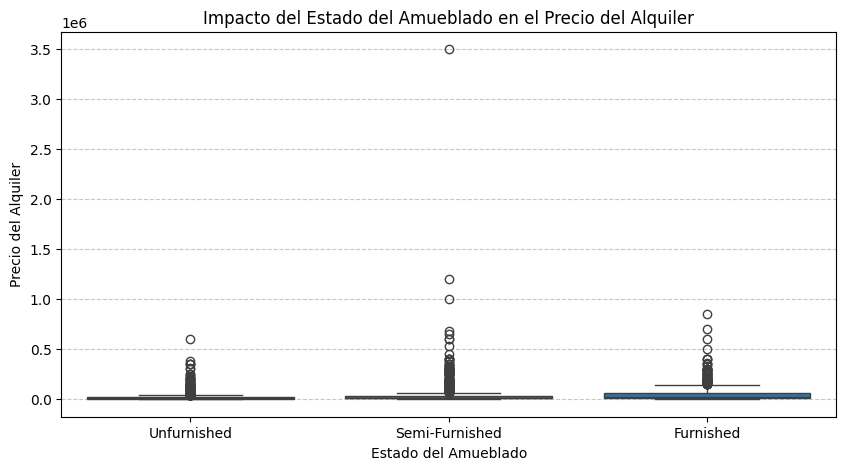

In [ ]:
# Relación entre el estado del amueblado y el precio del alquiler
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Furnishing Status'], y=df['Rent'])
plt.xlabel('Estado del Amueblado')
plt.ylabel('Precio del Alquiler')
plt.title('Impacto del Estado del Amueblado en el Precio del Alquiler')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

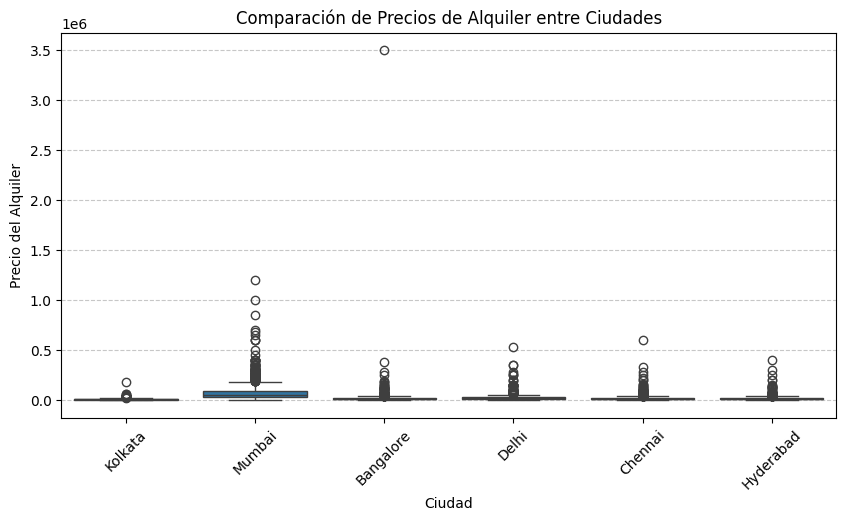

In [ ]:
# Relación entre ciudad y precio del alquiler
plt.figure(figsize=(10,5))
sns.boxplot(x=df['City'], y=df['Rent'])
plt.xlabel('Ciudad')
plt.ylabel('Precio del Alquiler')
plt.title('Comparación de Precios de Alquiler entre Ciudades')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

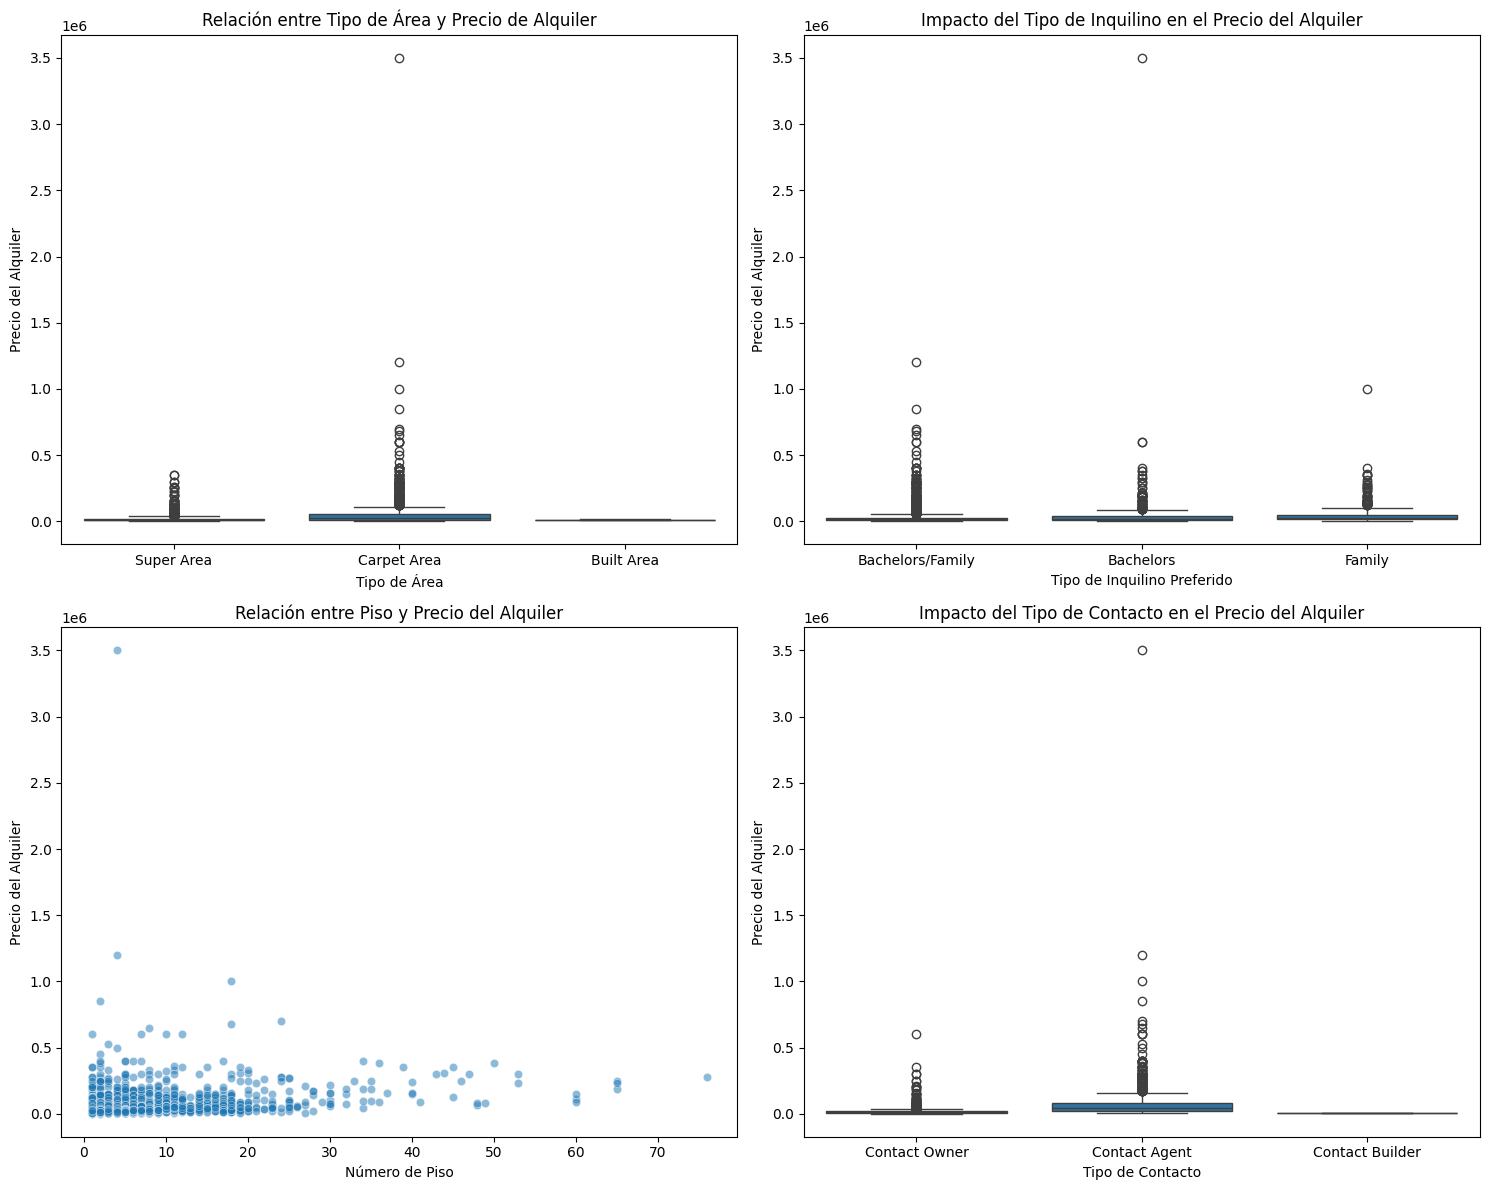

In [ ]:
# Visualización de la relación entre Precio del Alquiler con las otras variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Relación entre tipo de área y precio del alquiler
sns.boxplot(x=df['Area Type'], y=df['Rent'], ax=axes[0, 0])
axes[0, 0].set_title('Relación entre Tipo de Área y Precio de Alquiler')
axes[0, 0].set_xlabel('Tipo de Área')
axes[0, 0].set_ylabel('Precio del Alquiler')

# Relación entre tipo de inquilino preferido y precio del alquiler
sns.boxplot(x=df['Tenant Preferred'], y=df['Rent'], ax=axes[0, 1])
axes[0, 1].set_title('Impacto del Tipo de Inquilino en el Precio del Alquiler')
axes[0, 1].set_xlabel('Tipo de Inquilino Preferido')
axes[0, 1].set_ylabel('Precio del Alquiler')

# Relación entre el piso y el precio del alquiler (extracción del primer número del piso)
df['Floor Level'] = df['Floor'].str.extract('(\d+)').astype(float)
sns.scatterplot(x=df['Floor Level'], y=df['Rent'], alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Relación entre Piso y Precio del Alquiler')
axes[1, 0].set_xlabel('Número de Piso')
axes[1, 0].set_ylabel('Precio del Alquiler')

# Relación entre el contacto del propietario y el precio del alquiler
sns.boxplot(x=df['Point of Contact'], y=df['Rent'], ax=axes[1, 1])
axes[1, 1].set_title('Impacto del Tipo de Contacto en el Precio del Alquiler')
axes[1, 1].set_xlabel('Tipo de Contacto')
axes[1, 1].set_ylabel('Precio del Alquiler')

plt.tight_layout()
plt.show()


In [ ]:
# ------------------------ 2️⃣ Preprocesamiento de datos ------------------------
# Eliminar columnas irrelevantes
df.drop(columns=["Posted On", "Point of Contact"], inplace=True)

# Separar la información de "Floor"
df[['Current Floor', 'Total Floors']] = df['Floor'].str.extract(r'(\d+|Ground)\D+(\d+)?')
df['Current Floor'] = df['Current Floor'].replace('Ground', 0).astype(float)
df['Total Floors'] = df['Total Floors'].astype(float)
df.drop(columns=['Floor'], inplace=True)

# Aplicar One-Hot Encoding a columnas con pocas categorías
one_hot_cols = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Codificación por frecuencia para 'Area Locality'
locality_counts = df['Area Locality'].value_counts()
df['Area Locality Encoded'] = df['Area Locality'].map(locality_counts)
df.drop(columns=['Area Locality'], inplace=True)  # Eliminamos la original

# Manejo de valores nulos
df.dropna(inplace=True)

# Escalado de variables numéricas
scaler = MinMaxScaler()
numerical_columns = ['BHK', 'Size', 'Bathroom', 'Area Locality Encoded']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Escalar la variable objetivo "Rent"
rent_scaler = MinMaxScaler()
df['Rent_Scaled'] = rent_scaler.fit_transform(df[['Rent']])

# Eliminar la columna original de Rent
df.drop(columns=['Rent'], inplace=True)

# Filtrar outliers en Rent usando el método del rango intercuartil (IQR)
Q1 = df['Rent_Scaled'].quantile(0.25)
Q3 = df['Rent_Scaled'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Rent_Scaled'] >= lower_bound) & (df['Rent_Scaled'] <= upper_bound)]

# Eliminar columnas con baja correlación
df.drop(columns=['Current Floor', 'Total Floors'], inplace=True)

# Guardar el dataset preprocesado
df.to_csv("House_Rent_Dataset_Cleaned.csv", index=False)

In [ ]:
# ------------------------ 3️⃣ División en entrenamiento y prueba ------------------------
X = df.drop(columns=['Rent_Scaled'])
y = df['Rent_Scaled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [ ]:
# ------------------------ 4️⃣ Construcción de la Red Neuronal con Ajuste de Hiperparámetros ------------------------
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Se ajusta la tasa de aprendizaje en Adam
optimizer = Adam(learning_rate=0.0003)

# Compilar el modelo con optimizador ajustado
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ------------------------ 5️⃣ Entrenamiento del Modelo con más épocas ------------------------
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0142 - mae: 0.0706 - val_loss: 1.7402e-04 - val_mae: 0.0105
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0018 - mae: 0.0282 - val_loss: 1.4453e-04 - val_mae: 0.0097
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - mae: 0.0208 - val_loss: 7.8335e-05 - val_mae: 0.0067
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.7082e-04 - mae: 0.0164 - val_loss: 4.6931e-05 - val_mae: 0.0053
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0117e-04 - mae: 0.0136 - val_loss: 3.6491e-05 - val_mae: 0.0047
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7969e-04 - mae: 0.0122 - val_loss: 3.8917e-05 - val_mae: 0.0047
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5603e-04 - mae: 0.0100 - val_loss: 4.8161e-05 - val_mae: 0.0044
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4976e-04 - mae: 0.0089 - val_loss: 3.1683e-05 - val_mae: 0.0

In [ ]:
# ------------------------ 6️⃣ Evaluación del Modelo ------------------------
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss (MSE): {loss}, MAE: {mae}")

# Desescalar los valores predichos
y_pred_scaled = model.predict(X_test)
y_pred_actual = rent_scaler.inverse_transform(y_pred_scaled)
y_test_actual = rent_scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Comparación de valores reales vs predichos
comparison = np.concatenate((y_test_actual[:10], y_pred_actual[:10]), axis=1)
print("\n🔹 Comparación de Rent (Real vs Predicho):")
print(pd.DataFrame(comparison, columns=["Rent Real", "Rent Predicho"]))


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0520e-06 - mae: 0.0014
Loss (MSE): 4.096931206731824e-06, MAE: 0.0013990605948492885
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

🔹 Comparación de Rent (Real vs Predicho):
   Rent Real  Rent Predicho
0     6000.0   10786.117188
1    10000.0   18570.197266
2    20000.0   21045.902344
3    45000.0   35712.503906
4    37000.0   49580.917969
5    14000.0   11248.968750
6     5000.0   11624.370117
7    16500.0   14731.666992
8    15000.0   13515.041016
9    30000.0   37383.957031


In [ ]:
# Guardar el modelo entrenado
model.save("house_rent_model.h5")

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,709 (534.02 KB)

 Trainable params: 45,569 (178.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 91,140 (356.02 KB)

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np

# Cargar el modelo previamente guardado
model = load_model("house_rent_model.h5")

# Supongamos que tenemos nuevos datos para predecir
new_data = np.array([[0.5, 0.7, 0.4, 0.6, 1, 0, 1, 0, 0, 120]])  # Asegúrate de usar la misma escala
predicted_rent = model.predict(new_data)

# Si usaste MinMaxScaler en la variable "Rent", desescala el valor
predicted_rent_actual = rent_scaler.inverse_transform(predicted_rent)
print(f"Predicción de alquiler: {predicted_rent_actual[0][0]}")


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}